In [1]:
import numpy as np
import pandas as pd
import scipy.io as sc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mat= sc.loadmat('E:\VS CODE\machine-learning-andrew-ng-master\machine-learning-andrew-ng-master\data\ex7data2.mat')

In [3]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Nov 16 00:48:22 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ 1.84207953,  4.6075716 ],
        [ 5.65858312,  4.79996405],
        [ 6.35257892,  3.2908545 ],
        [ 2.90401653,  4.61220411],
        [ 3.23197916,  4.93989405],
        [ 1.24792268,  4.93267846],
        [ 1.97619886,  4.43489674],
        [ 2.23454135,  5.05547168],
        [ 2.98340757,  4.84046406],
        [ 2.97970391,  4.80671081],
        [ 2.11496411,  5.37373587],
        [ 2.12169543,  5.20854212],
        [ 1.5143529 ,  4.77003303],
        [ 2.16979227,  5.27435354],
        [ 0.41852373,  4.88312522],
        [ 2.47053695,  4.80418944],
        [ 4.06069132,  4.99503862],
        [ 3.00708934,  4.67897758],
        [ 0.66632346,  4.87187949],
        [ 3.1621865 ,  4.83658301],
        [ 0.51155258,  4.91052923],
        [ 3.1342801 ,  4.96178114],
        [ 2.04974595,  5.6241395 ],
        [ 0.66582785,  5.243

In [4]:
X= mat["X"]

In [5]:
# Initialization of Centroids
in_centroids= np.array([[3,3], [6, 2], [8,5]])

# Finding the closest centroids and assigning of indices for each training example

In [6]:
def find_close_cent(X, in_centroids):
    idx= np.zeros((X.shape[0],1))
    for i in range(len(idx)):
        idx[i]= np.argmin(np.sqrt(np.sum((X[i]- in_centroids)**2, axis= 1)))+1  #  +1 is because index starts from zero
        """here np.sum(X[i, :]-centroids)**2, axis= 1 is used to sum up the square of distance between first training example and the 3 randomly initialized centroid coordinates
         and then np.argmin is used to find the index value for  min of the 3 values then idx[i] stores that index 
        which means the respective training examples is assigned to that cluster index """
    return idx


In [7]:
idx= find_close_cent(X, in_centroids)

In [8]:
idx[:3].T[0]  # idx for first 3 training examples

array([1., 3., 2.])

# Compute the new coordinates of the centroids

In [9]:
def compute_centroids(X, idx, K):
    centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        centroids[i,:] = np.mean(X[(idx==i+1).T[0], :], axis=0)
    return centroids

In [10]:
centroids = compute_centroids(X, idx, 3)

In [11]:
centroids

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [12]:
def plot_kmeans(X, centroids, previous, idx, K, axes):
    for i, ax in enumerate(axes):
        sns.scatterplot(x= X[:,0], y= X[:, 1], hue= idx.ravel(), legend= False, palette=['r', 'g', 'b'], ax= ax)
        if i==0:
            sns.scatterplot(x= centroids[:, 0], y= centroids[:, 1], marker= 'X', color= "k", legend= False, s= 100, ax= ax)
        else:
            sns.scatterplot(x= centroids[:, 0], y= centroids[:, 1], marker= 'X', color= "k", legend= False, s= 100, ax= ax)
        for i in range(centroids.shape[0]):
            ax.plot([centroids[i, 0], previous[i, 0]], [centroids[i, 1], previous[i, 1]], "--k");

In [13]:
def kmeans(X, initial_centroids, max_iters, plot_progress):
    if plot_progress:
        ncols= 3
        nrows= int(max_iters/ncols)
        if max_iters% ncols >0:
            nrows= nrows+1
        fig, axes= plt.subplots(nrows=nrows, ncols= ncols, figsize= (20, nrows*8))
        ax_tuple= list(np.ndindex(nrows, ncols))
        for ax in ax_tuple[max_iters:]:   # this for loop is for if max_iter is < no of subplots then this for loop makes the extra subplots will be hided 
            axes[ax].set_axis_off()
        ax_tuple= ax_tuple[:max_iters]   # this line makes the tuple list of subplots according to the max_iters
    K= initial_centroids.shape[0]
    centroids= initial_centroids
    previous_centroids= centroids

    for i in range(max_iters):
        idx= find_close_cent(X, centroids)

        if plot_progress:
            plot_axes= [axes[axi] for axi in ax_tuple[i:]]
            axes[ax_tuple[i]].set_title('K means iteration {0}/{1}'.format(i+1, max_iters))
            plot_kmeans(X, centroids, previous_centroids, idx, K, plot_axes)
            previous_centroids= centroids
            previous_ax= plt.gca()
        else:
            print('K means iteration {0}/{1}'.format(i+1, max_iters))
        centroids= compute_centroids(X, idx, K)
    if plot_progress:
        plt.show()
    return centroids, idx
        

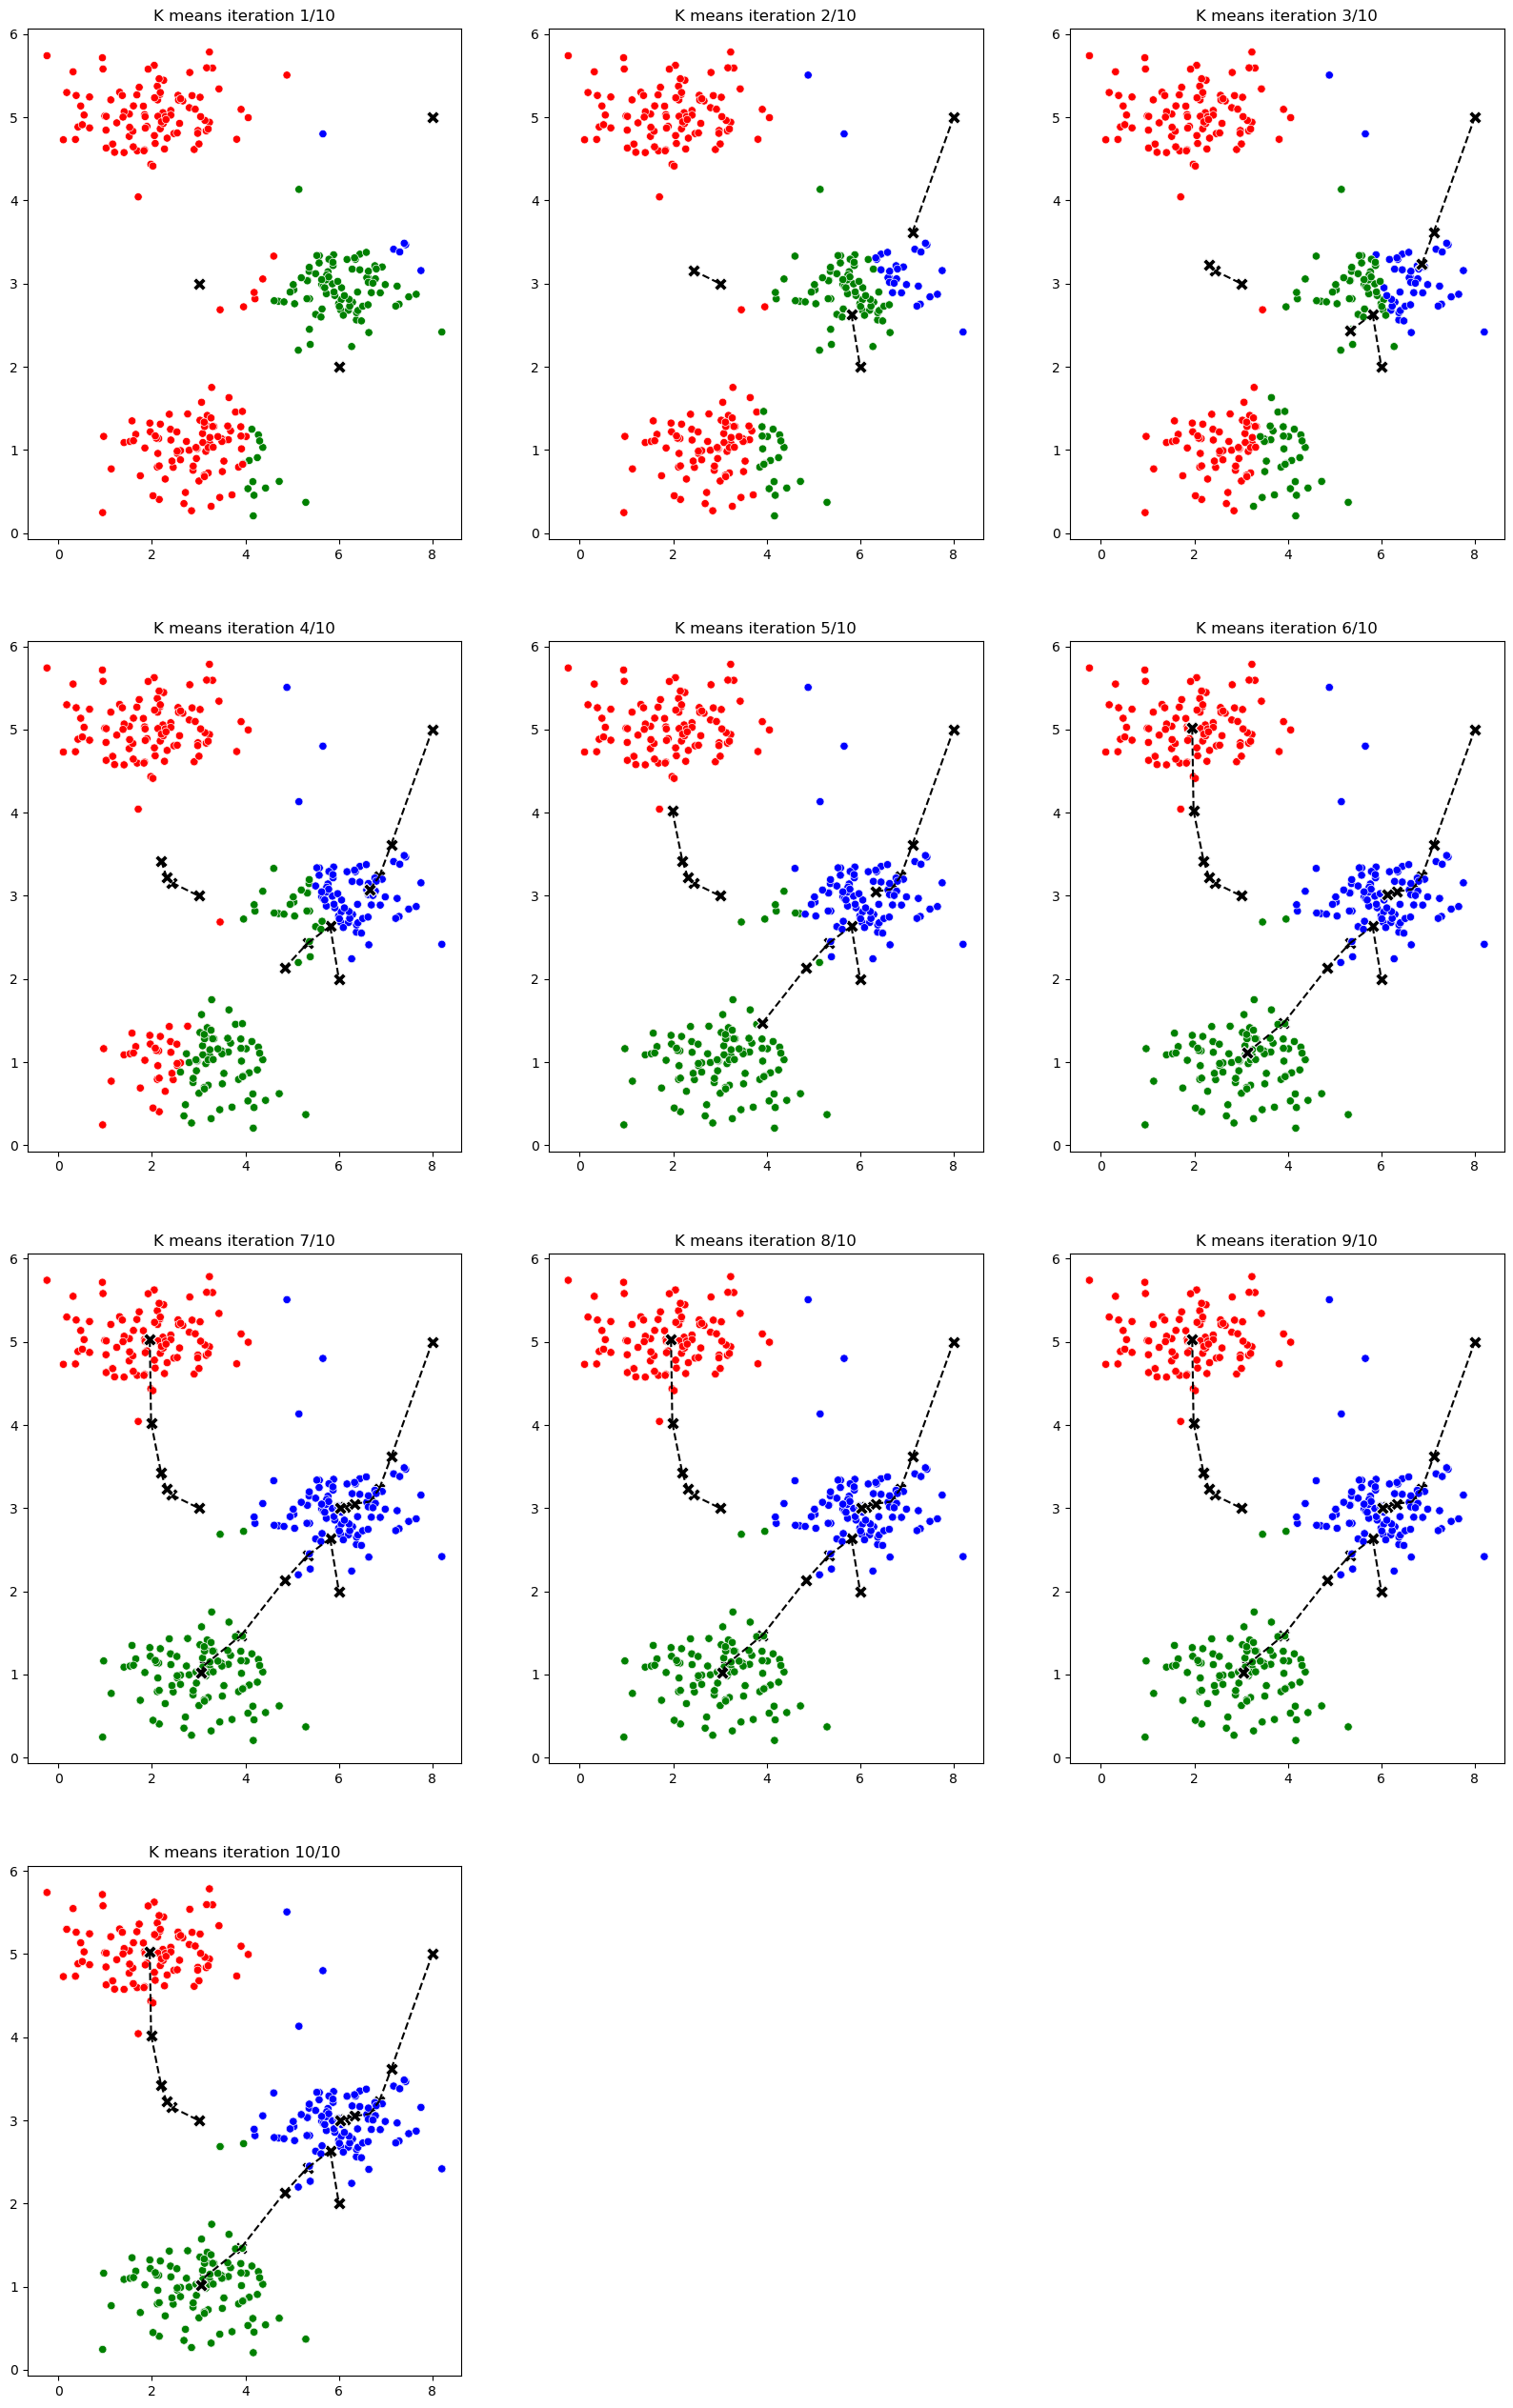

In [14]:
K = 3
max_iters = 10
initial_centroids = np.array([[3,3],[6,2],[8,5]])
centroids, idx = kmeans(X, initial_centroids, max_iters, True)

# Random initialization of centroids within the given data

In [15]:
def init_random_centroids(X, K):
    centroids = X[(np.random.choice(X.shape[0], K)), :]
    return centroids

# Equivalent Coding in sk learn

In [16]:
from sklearn.cluster import KMeans
initial_centroids= np.array([[3,3], [6, 2], [8, 5]])
kmeans_model= KMeans(n_clusters=K, max_iter=max_iters, init= initial_centroids).fit(X)

e:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


In [17]:
kmeans_model.cluster_centers_ 

array([[1.95399466, 5.02557006],
       [3.04367119, 1.01541041],
       [6.03366736, 3.00052511]])

In [18]:
centroids

array([[1.95399466, 5.02557006],
       [3.04367119, 1.01541041],
       [6.03366736, 3.00052511]])

In [19]:
(kmeans_model.labels_.all()) == (idx.T[0].astype(int)-1).all() 

True

# Image Compression with K- Means

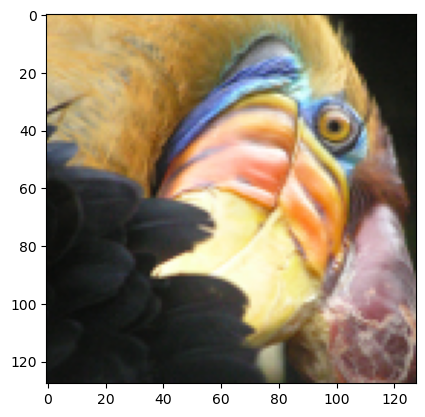

In [34]:
import cv2
img = cv2.imread('data/bird_small.png')
plt.axis('on');
plt.imshow(img[:,:,::-1]);

In [35]:
A= img[:, :, ::-1]

In [36]:
A= np.divide(img, 255)
A.shape

(128, 128, 3)

In [37]:
A= A.reshape(A.shape[0]* A.shape[1], 3)

In [38]:
A

array([[0.40392157, 0.70588235, 0.85882353],
       [0.45490196, 0.7254902 , 0.90196078],
       [0.43137255, 0.72941176, 0.88627451],
       ...,
       [0.15294118, 0.16862745, 0.25490196],
       [0.14901961, 0.14509804, 0.22745098],
       [0.13333333, 0.15294118, 0.20392157]])

In [39]:
K = 16
max_iters= 10
initial_centroids= init_random_centroids(A, K)

In [40]:
initial_centroids

array([[0.42745098, 0.39607843, 0.45882353],
       [0.05490196, 0.06666667, 0.0627451 ],
       [0.38823529, 0.64705882, 0.75686275],
       [0.18431373, 0.50980392, 0.70980392],
       [0.21960784, 0.27843137, 0.34117647],
       [0.07058824, 0.11372549, 0.10980392],
       [0.36862745, 0.54117647, 0.88627451],
       [0.19215686, 0.21176471, 0.31764706],
       [0.11372549, 0.11764706, 0.09803922],
       [0.23529412, 0.72941176, 0.9254902 ],
       [0.10980392, 0.30588235, 0.50980392],
       [0.39215686, 0.56470588, 0.6627451 ],
       [0.44705882, 0.72941176, 0.99215686],
       [0.80392157, 0.75686275, 0.8745098 ],
       [0.18039216, 0.20784314, 0.23137255],
       [0.24313725, 0.34509804, 0.41568627]])

In [41]:
centroids, idx= kmeans(A, initial_centroids, max_iters, False)

K means iteration 1/10
K means iteration 2/10
K means iteration 3/10
K means iteration 4/10
K means iteration 5/10
K means iteration 6/10
K means iteration 7/10
K means iteration 8/10
K means iteration 9/10
K means iteration 10/10


In [42]:
idx= find_close_cent(A, centroids)
idx= idx.astype(int)

In [43]:
idx.shape

(16384, 1)

In [44]:
X_recovered= np.zeros((idx.shape[0], 3))
for i in range(idx.shape[0]):
    X_recovered[i, :]= centroids[idx[i]-1, :]

In [45]:
X_recovered= X_recovered.reshape((img.shape[0], img.shape[1], 3))

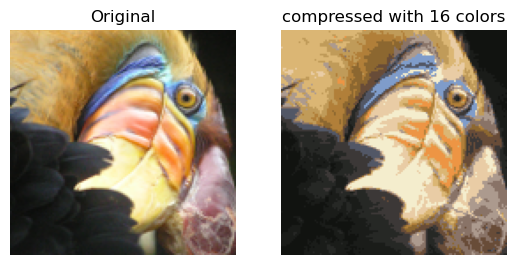

In [46]:
plt.subplot(1, 2, 1)
plt.axis("off");
plt.title("Original")
plt.imshow(img[:, :, ::-1])

plt.subplot(1, 2,2 )
plt.axis("off")
plt.title("compressed with 16 colors")
plt.imshow(X_recovered[:, :, ::-1]);

In [47]:
K_vals= [2, 8, 16, 24, 30]
max_iters= 10

imgs_compressed=[]
for ik, K in enumerate(K_vals):
    print("\n Running K- Means with K= {}".format(K))
    initial_centroids= init_random_centroids(A, K)
    centroids, idx= kmeans(A, initial_centroids, max_iters, False)

    idx= find_close_cent(A, centroids)
    idx= idx.astype(int)

    X_recovered= np.zeros((idx.shape[0], 3))
    for i in range(idx.shape[0]):
        X_recovered[i, :]= centroids[idx[i]-1, :]
    X_recovered= X_recovered.reshape((img.shape[0], img.shape[1], 3))
    imgs_compressed.append(X_recovered)



 Running K- Means with K= 2
K means iteration 1/10
K means iteration 2/10
K means iteration 3/10
K means iteration 4/10
K means iteration 5/10
K means iteration 6/10
K means iteration 7/10
K means iteration 8/10
K means iteration 9/10
K means iteration 10/10

 Running K- Means with K= 8
K means iteration 1/10
K means iteration 2/10
K means iteration 3/10
K means iteration 4/10
K means iteration 5/10
K means iteration 6/10
K means iteration 7/10
K means iteration 8/10
K means iteration 9/10
K means iteration 10/10

 Running K- Means with K= 16
K means iteration 1/10
K means iteration 2/10
K means iteration 3/10
K means iteration 4/10
K means iteration 5/10
K means iteration 6/10
K means iteration 7/10
K means iteration 8/10
K means iteration 9/10
K means iteration 10/10

 Running K- Means with K= 24
K means iteration 1/10
K means iteration 2/10
K means iteration 3/10
K means iteration 4/10
K means iteration 5/10
K means iteration 6/10
K means iteration 7/10
K means iteration 8/10
K mea

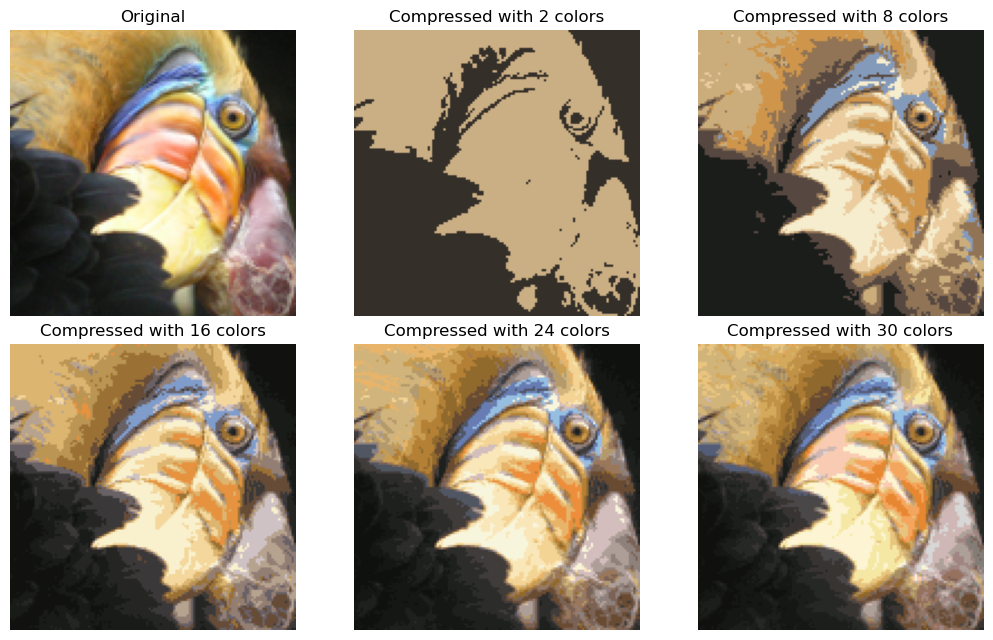

In [48]:
fig = plt.figure(figsize=(10,6))
rows = 2
cols = 3
ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(img[:,:,::-1])
ax1.set_axis_off()
ax1.set_title('Original')
for i in range(len(imgs_compressed)):
    ax1 = fig.add_subplot(rows, cols, i+2)
    ax1.imshow(imgs_compressed[i][:,:,::-1])
    ax1.set_axis_off()
    ax1.set_title('Compressed with {} colors'.format(K_vals[i]))
plt.subplots_adjust(wspace=.1, hspace=.1, left=0, right=1, bottom=0, top=1)
plt.show()

# K- Nearest Neighbours (KNN)

Knn Assignment

Since Training set is so large i have considered first 6000 samples for training the algorithm and considered 100 random test samples from the test set and performed the testing by taking K_value= 20. Accuracy for training and testing is also reported.

In [1]:
import numpy as np
import matplotlib.pyplot as plt     # Importing all the Required libraries
import pandas as pd

In [2]:
train_data= pd.read_csv("mnist_train.csv")    # load of train_data

In [3]:
train_data.shape    # gives the shape of train set

(60000, 785)

In [4]:
train_data= np.array(train_data)   # train_set to array

In [5]:
X_train= train_data[:, 1:]   # training image pixel data
y_train= train_data[:, 0]    # training image label

In [6]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

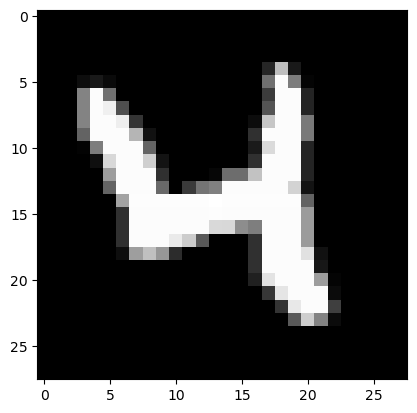

In [8]:
plt.imshow(X_train[20].reshape((28, 28)), cmap="gray")

In [9]:
X_train.shape

(60000, 784)

In [10]:
y_train.shape

(60000,)

In [11]:
test_data= pd.read_csv("mnist_test.csv")

In [12]:
test_data= np.array(test_data)
X_test= test_data[:, 1:]

In [13]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
y_test= test_data[:, 0]

In [15]:

df_train= pd.DataFrame(X_train)     # convertging the array of X_train and X_test into DataFrames
df_test= pd.DataFrame(X_test)

In [16]:
df_y_train= pd.DataFrame(data= y_train, columns= ["label"])
df_y_test= pd.DataFrame(data= y_test, columns= ["label"])       # converting the Y_values of training and testing to DataFrames


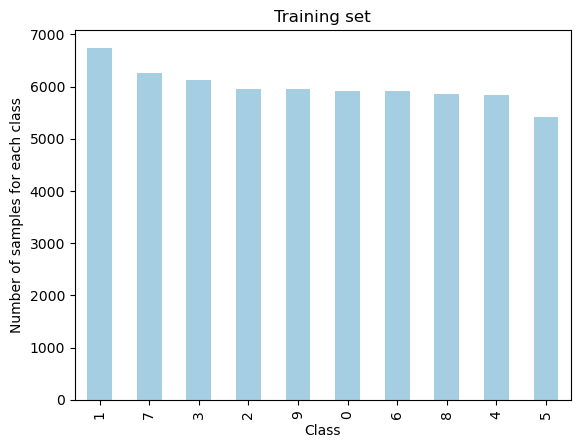

In [17]:
df_y_train['label'].value_counts().plot(kind = 'bar', colormap = 'Paired')
plt.xlabel('Class')
plt.ylabel('Number of samples for each class')     # Plotting bar chart showing the no of examples present in each class in training set
plt.title('Training set')
plt.show()

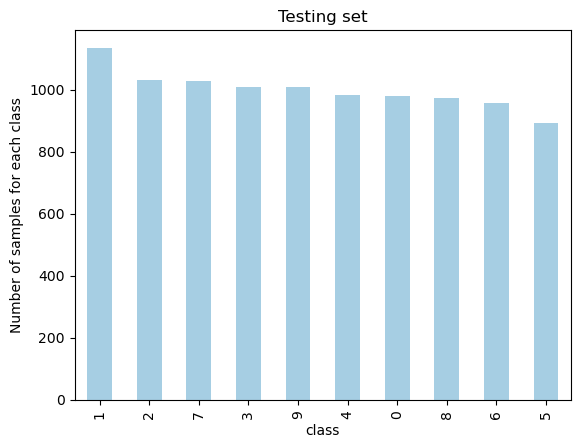

In [18]:
df_y_test["label"].value_counts().plot(kind= "bar", colormap= "Paired")
plt.xlabel("class")
plt.ylabel("Number of samples for each class")    # Bar chart showing the no of examples in each class  in testing set
plt.title("Testing set")
plt.show()

In [19]:
# calculate euclidean distance

def dist(x,y):
    return np.sqrt(np.sum((x-y)**2))

In [20]:

import random
df_random_test= df_test.sample(n= 100, random_state=1)   # Taking 100 random testing samples from testing set

df_random_test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
9953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3850,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Since training set is large, I am taking first 6000 training samples for training the algorithm

In [36]:
train_distance_list_rand = []   # list to store distances between one train vector and all the train vectors for each iteration
train_ind_counter_rand = []  # a list to store index

k= 20   # k values

train_pred_list_rand = []   # list to store the predicted values


# training the knn model
# iterating through the training set
for i in range(6000):
    train_vec_one = df_train.iloc[i]
    # iterating through the training set
    for j in range(0,6000):
        train_vec = df_train.iloc[j]
        # calculate euclidean distance by calling function dist
        euclidean_dist = dist(train_vec_one,train_vec)
        train_distance_list_rand.append(euclidean_dist)
        # increment the index
        train_ind_counter_rand.append(j)
    d = {'index':train_ind_counter_rand, 'distance': train_distance_list_rand}
  # convert dictionary to dataframe
    df = pd.DataFrame(d, columns = ['index', 'distance'])
  # sort in ascending order by euclidean distance
    df_sorted = df.sort_values(by = 'distance')

    index_list = list(df_sorted['index'][:k])    # to get the index list of sorted distances as per given k vlaue
    distance = list(df_sorted['distance'][:k])    # to store all the k sorted distances
    res_list = [y_train[i] for i in index_list]
    # now get the count of the max class in result list
    pred_value = max(res_list,key=res_list.count)
  # storing every prediction in the list
    train_pred_list_rand.append(pred_value)
        
  # reinitialize the list
    train_ind_counter_rand = []
    train_distance_list_rand = []

In [41]:
len(train_pred_list_rand)

6000

In [42]:
train_pred_list_rand

[5,
 0,
 4,
 1,
 9,
 2,
 1,
 3,
 1,
 4,
 3,
 5,
 3,
 6,
 1,
 7,
 2,
 8,
 6,
 9,
 4,
 0,
 9,
 1,
 1,
 2,
 4,
 3,
 7,
 7,
 3,
 8,
 6,
 9,
 0,
 5,
 6,
 0,
 7,
 6,
 1,
 8,
 7,
 9,
 3,
 9,
 8,
 5,
 3,
 3,
 3,
 0,
 7,
 1,
 9,
 8,
 0,
 9,
 4,
 1,
 4,
 1,
 6,
 0,
 4,
 5,
 6,
 1,
 0,
 0,
 1,
 7,
 1,
 6,
 3,
 0,
 2,
 1,
 1,
 7,
 0,
 0,
 2,
 6,
 7,
 8,
 3,
 9,
 0,
 4,
 6,
 7,
 4,
 6,
 8,
 0,
 7,
 8,
 3,
 1,
 5,
 7,
 1,
 7,
 1,
 1,
 6,
 3,
 0,
 2,
 9,
 3,
 1,
 1,
 0,
 4,
 9,
 2,
 0,
 0,
 7,
 0,
 2,
 7,
 1,
 8,
 6,
 4,
 1,
 6,
 3,
 4,
 1,
 9,
 1,
 3,
 3,
 1,
 5,
 4,
 7,
 7,
 4,
 2,
 8,
 5,
 8,
 6,
 9,
 3,
 1,
 6,
 1,
 9,
 7,
 6,
 0,
 3,
 7,
 2,
 8,
 2,
 9,
 4,
 4,
 6,
 4,
 9,
 7,
 0,
 9,
 2,
 7,
 5,
 1,
 5,
 9,
 1,
 0,
 3,
 1,
 3,
 5,
 9,
 1,
 7,
 6,
 2,
 8,
 2,
 2,
 5,
 0,
 7,
 4,
 9,
 7,
 8,
 3,
 2,
 1,
 1,
 8,
 3,
 6,
 1,
 0,
 7,
 1,
 0,
 0,
 1,
 1,
 2,
 7,
 3,
 0,
 4,
 6,
 5,
 2,
 6,
 4,
 7,
 7,
 8,
 9,
 9,
 3,
 0,
 7,
 1,
 0,
 2,
 0,
 3,
 5,
 4,
 6,
 5,
 1,
 6,
 3,
 7,
 5,
 8,
 0,
 9,
 1,
 0,


In [56]:
# Testing on random_100_samples for k=20
test_distance_list_random= []    # list for storing the distances between each test_vector and all the training vectors for each iteration
test_ind_counter_rand= []     #list for storing the index after each iteration
test_pred_list_rand=[]   # List to store all the predicted values
k= 20      # k value

for i in range(0, 100):
  test_vec_rand= df_random_test[i]
  for j in range(0, 6000):
    train_vec= df_train.iloc[j]
    euclidean_dist= dist(test_vec_rand, train_vec)
    test_distance_list_random.append(euclidean_dist)
    test_ind_counter_rand.append(j)

# dictionary to store all the results

  d = {'index':test_ind_counter_rand, 'distance': test_distance_list_random}
  # convert dictionary to dataframe
  df = pd.DataFrame(d, columns = ['index', 'distance'])
  # sort in ascending order by euclidean distance
  df_sorted = df.sort_values(by = 'distance')

  index_list= list(df_sorted["index"][: k])
  distance = list(df_sorted['distance'][:k])
  res_list = [y_train[ind] for ind in index_list]

  pred_value = max(res_list,key=res_list.count)
        # storing every prediction in respective list
  test_pred_list_rand.append(pred_value)

  test_ind_counter_rand = []
  test_distance_list_random = []

In [58]:
# calculating results for train set
train_pred = 0
# element wise comparison to find the accuracy
for l1,l2 in zip(train_pred_list_rand, y_train[:6000].tolist()):
    if l1 == l2:
    # increment when there is a match
      train_pred+= 1
accuracy = train_pred/6000
print('The train accuracy is '+str(round(accuracy*100,2))+'% for K='+str(k))

The train accuracy is 76.38% for K=20


In [62]:
# calculating results for test set
test_pred = 0

df_random_index= df_random_test.index
y_test_rand= y_test[df_random_index]
for i, j in zip(test_pred_list_rand, y_test_rand):
  if i== j:
    test_pred += 1 
accuracy = test_pred/100
print('The test accuracy is '+str(accuracy*100)+'% for K='+str(k))


The test accuracy is 6.0% for K=20


# Analysis by taking Different K Values (Not included in Assignment)

In [ ]:
# a list to store euclidean distance
train_distance_list = []
# a list to store index
train_ind_counter = []
# a list with all the K values
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 20, 21]
# creating a list of list for storing the predictions for each value of K
train_pred_lists = [[] for _ in range(len(k_values))]

# training the knn model
# iterating through the training set
for i in range(0,6000):
    train_vec_one = df_train.iloc[i]
    # iterating through the training set
    for j in range(0,6000):
        train_vec = df_train.iloc[j]
        # calculate euclidean distance by calling function dist
        euclidean_dist = dist(train_vec_one,train_vec)
        train_distance_list.append(euclidean_dist)
        # increment the index
        train_ind_counter.append(j)
    
    # dictionary to store all the results
    d = {'index':train_ind_counter, 'distance': train_distance_list}
    # convert dictionary to dataframe
    df = pd.DataFrame(d, columns = ['index', 'distance'])
    # sort in ascending order by euclidean distance
    df_sorted = df.sort_values(by = 'distance')

    # iterate through each value of K
    for K in range(len(k_values)):
        index_list = list(df_sorted['index'][:k_values[K]])
        distance = list(df_sorted['distance'][:k_values[K]])
        res_list = [y_train[i] for i in index_list]
        # now get the count of the max class in result list
        pred_value = max(res_list,key=res_list.count)
        # storing every prediction for K in respective list
        train_pred_lists[K].append(pred_value)
    
    # reinitialize the list
    train_ind_counter = []
    train_distance_list = []

In [ ]:
train_pred_lists

[[5,
  0,
  4,
  1,
  9,
  2,
  1,
  3,
  1,
  4,
  3,
  5,
  3,
  6,
  1,
  7,
  2,
  8,
  6,
  9,
  4,
  0,
  9,
  1,
  1,
  2,
  4,
  3,
  2,
  7,
  3,
  8,
  6,
  9,
  0,
  5,
  6,
  0,
  7,
  6,
  1,
  8,
  7,
  9,
  3,
  9,
  8,
  5,
  9,
  3,
  3,
  0,
  7,
  4,
  9,
  8,
  0,
  9,
  4,
  1,
  4,
  4,
  6,
  0,
  4,
  5,
  6,
  1,
  0,
  0,
  1,
  7,
  1,
  6,
  3,
  0,
  2,
  1,
  1,
  7,
  9,
  0,
  2,
  6,
  7,
  8,
  3,
  9,
  0,
  4,
  6,
  7,
  4,
  6,
  8,
  0,
  7,
  8,
  3,
  1,
  5,
  7,
  1,
  7,
  1,
  1,
  6,
  3,
  0,
  2,
  9,
  3,
  1,
  1,
  0,
  4,
  9,
  2,
  0,
  0,
  2,
  0,
  2,
  7,
  1,
  8,
  6,
  4,
  1,
  6,
  3,
  4,
  5,
  9,
  1,
  3,
  3,
  8,
  5,
  4,
  7,
  7,
  4,
  2,
  8,
  5,
  8,
  6,
  7,
  3,
  4,
  6,
  1,
  9,
  9,
  6,
  0,
  3,
  7,
  2,
  8,
  2,
  9,
  4,
  4,
  6,
  4,
  9,
  7,
  0,
  9,
  2,
  9,
  5,
  1,
  5,
  9,
  1,
  2,
  3,
  2,
  3,
  5,
  9,
  1,
  7,
  6,
  2,
  8,
  2,
  2,
  5,
  0,
  7,
  4,
  9,
  7,
  8,
  3,
  2,


In [ ]:
# a list to store euclidean distance
test_distance_list = []
# a list to store index
test_ind_counter = []
# creating a list of list for storing the predictions for each value of K
test_pred_lists = [[] for _ in range(len(k_values))]

# testing the knn model
# iterating through the test set
for i in range(0,100):
    test_vec = df_test.iloc[i]
    # iterating through the training set
    for j in range(0,6000): 
        train_vec = df_train.iloc[j]
        # calculate euclidean distance
        euclidean_dist = dist(test_vec,train_vec)
        test_distance_list.append(euclidean_dist)
        # increment the index
        test_ind_counter.append(j)
    
    # dictionary to store all the results
    d = {'index':test_ind_counter, 'distance': test_distance_list}
    # convert dictionary to dataframe
    df = pd.DataFrame(d, columns = ['index', 'distance'])
    # sort in ascending order by euclidean distance
    df_sorted = df.sort_values(by = 'distance')

    # iterate through each value of K
    for K in range(len(k_values)):
        index_list = list(df_sorted['index'][:k_values[K]])
        distance = list(df_sorted['distance'][:k_values[K]])
        res_list = [train_pred_lists[K][ind] for ind in index_list]
        # now get the count of the max class in result list
        pred_value = max(res_list,key=res_list.count)
        # storing every prediction in respective list
        test_pred_lists[K].append(pred_value)
        
    # # reinitialize the list   
    test_ind_counter = []
    test_distance_list = []

In [ ]:
# calculating results for train set
train_pred = 0
train_pred_result = []
for K in range(len(k_values)):
    # element wise comparison to find the accuracy
    for l1,l2 in zip(train_pred_lists[K], y_train.tolist()):
        if l1 == l2:
            # increment when there is a match
            train_pred += 1
    accuracy = train_pred/6000
    train_pred_result.append((round(accuracy*100,2)))
    print('The train accuracy is '+str(round(accuracy*100,2))+'% for K='+str(k_values[K]))
    train_pred = 0

The train accuracy is 100.0% for K=1
The train accuracy is 97.82% for K=3
The train accuracy is 96.77% for K=5
The train accuracy is 96.05% for K=7
The train accuracy is 95.55% for K=9
The train accuracy is 95.07% for K=11
The train accuracy is 94.8% for K=13
The train accuracy is 94.43% for K=15
The train accuracy is 94.0% for K=17
The train accuracy is 93.73% for K=19
The train accuracy is 93.67% for K=20
The train accuracy is 93.43% for K=21


In [ ]:
# calculating results for test set
test_pred = 0
test_pred_result = []
for K in range(len(k_values)):
    for l1,l2 in zip(test_pred_lists[K], y_test.tolist()):
        if l1 == l2:
            test_pred += 1
    accuracy = test_pred/1000
    test_pred_result.append((round(accuracy*100,2)))
    print('The test accuracy is '+str(accuracy*100)+'% for K='+str(k_values[K]))
    test_pred = 0

The test accuracy is 90.4% for K=1
The test accuracy is 90.9% for K=3
The test accuracy is 91.5% for K=5
The test accuracy is 90.4% for K=7
The test accuracy is 89.8% for K=9
The test accuracy is 88.4% for K=11
The test accuracy is 88.9% for K=13
The test accuracy is 88.3% for K=15
The test accuracy is 87.9% for K=17
The test accuracy is 87.6% for K=19
The test accuracy is 86.8% for K=20
The test accuracy is 86.8% for K=21


In [ ]:
# getting all the results for train and test in a dataframe
df_result = pd.DataFrame()
df_result['K value'] = k_values
df_result['train pred'] = train_pred_result
df_result['test pred'] = test_pred_result
df_result

,K value,train pred,test pred
0,1,100.00,90.4
1,3,97.82,90.9
2,5,96.77,91.5
3,7,96.05,90.4
4,9,95.55,89.8
5,11,95.07,88.4
6,13,94.80,88.9
7,15,94.43,88.3
8,17,94.00,87.9
9,19,93.73,87.6


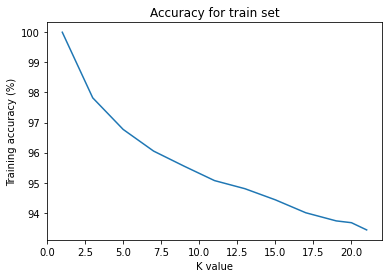

In [ ]:
plt.plot(df_result['K value'], df_result['train pred'])
plt.xlabel('K value')
plt.ylabel('Training accuracy (%)')
plt.title('Accuracy for train set')
plt.show()

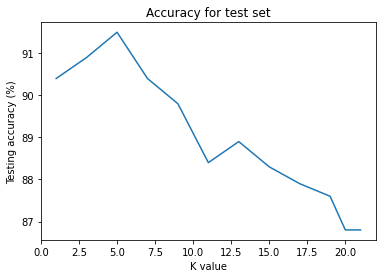

In [ ]:
plt.plot(df_result['K value'], df_result['test pred'])
plt.xlabel('K value')
plt.ylabel('Testing accuracy (%)')
plt.title('Accuracy for test set')
plt.show()

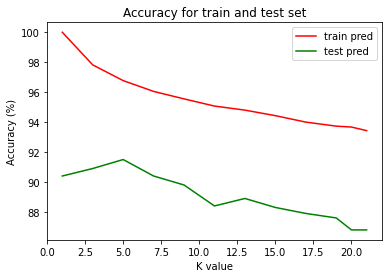

In [ ]:
plt.plot(df_result['K value'], df_result['train pred'], 'r', label = 'train pred')
plt.plot(df_result['K value'], df_result['test pred'], 'g', label = 'test pred')
plt.legend(loc='upper right')
plt.xlabel('K value')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy for train and test set')
plt.show()